In [1]:
import pandas as pd
import numpy as np
import random



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
urls_data = pd.read_csv(r'C:\urldata.csv')

In [3]:
urls_data.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number Of URLs')

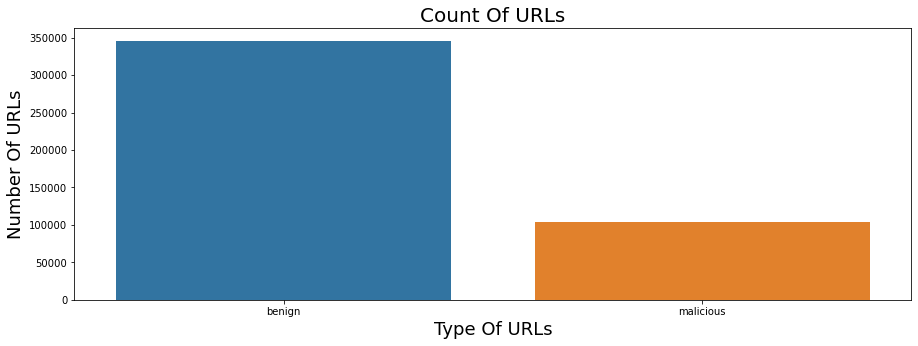

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urls_data)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [6]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))
    if 'com' in total_Tokens:
        total_Tokens.remove('com')
    return total_Tokens

In [7]:

y = urls_data["label"]

In [8]:
# Features
url_list = urls_data["url"]

In [9]:

vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [10]:

X = vectorizer.fit_transform(url_list)

C:\Users\Sneha Lalwani\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:

logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [13]:

print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9948020791683326


In [14]:
X_predict = ["google.com/search=jcharistech",
"google.com/search=faizanahmad",
"pakistanifacebookforever.com/getpassword.php/", 
"www.radsport-voggel.de/wp-admin/includes/log.exe", 
"ahrenhei.without-transfer.ru/nethost.exe ",
"www.itidea.it/centroesteticosothys/img/_notes/gum.exe"]

In [15]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [16]:
print(New_predict)

['benign' 'benign' 'malicious' 'malicious' 'malicious' 'malicious']


In [17]:

X_predict1 = ["www.buyfakebillsonlinee.blogspot.com", 
"www.unitedairlineslogistics.com",
"www.stonehousedelivery.com",
"www.silkroadmeds-onlinepharmacy.com" ]

In [18]:
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = logit.predict(X_predict1)
print(New_predict1)

['malicious' 'malicious' 'malicious' 'malicious']


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred2 = dt.predict(X_test)

In [21]:
print("Accuracy ",dt.score(X_test, y_test))

Accuracy  0.9981451863698965


In [22]:
final_data = pd.DataFrame({'Models':['logit','dT'],
              "ACC":[logit.score(X_test, y_test)*100,
                     dt.score(X_test, y_test)*100,
                     ]})

In [23]:
final_data

,Models,ACC
0,logit,99.480208
1,dT,99.814519


C:\Users\Sneha Lalwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

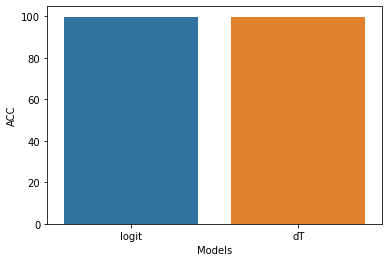

In [24]:
sns.barplot(final_data['Models'],final_data['ACC'])

# Saving the model

In [25]:
import joblib

In [26]:
filename="test_model"
joblib.dump(dt,filename)

['test_model']

In [29]:
loaded_model=joblib.load(filename)

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np
import re



 
def is_valid_url(url):
    
    regex = re.compile(
        r'^https?://'  
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|'  
        r'localhost|'  
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})'  
        r'(?::\d+)?'  
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)
    return re.match(regex, url)


def extract_features(url):
    features = np.zeros(780471)
    for i, c in enumerate(url):
        features[i] = ord(c)
    return features


def check_url():
    url = url_entry.get()
    if is_valid_url(url):
        features = extract_features(url)
        prediction = loaded_model.predict([features])[0]
        if prediction == 1:
            messagebox.showwarning('Warning', 'The URL is malicious!')
        else:
            messagebox.showinfo('Information', 'The URL is safe.')
    else:
        messagebox.showerror('Warning','The URL is not safe')


root = tk.Tk()
root.title('Malicious URL Checker')


url_label = tk.Label(root, text='Enter the URL:')
url_label.pack()
url_entry = tk.Entry(root, width=50)
url_entry.pack()


check_button = tk.Button(root, text='Check', command=check_url)
check_button.pack()


root.mainloop()
